In [44]:
'''
This is a sandbox to work on proving that we can get digital 
sound out of scans of an optical track. If I can manually 
get it to work here, I can then take this PoC and turn it into
a full application.
'''
import cv2
import os
import matplotlib.pyplot as plt
import math
import numpy as np

4056
4056
4056


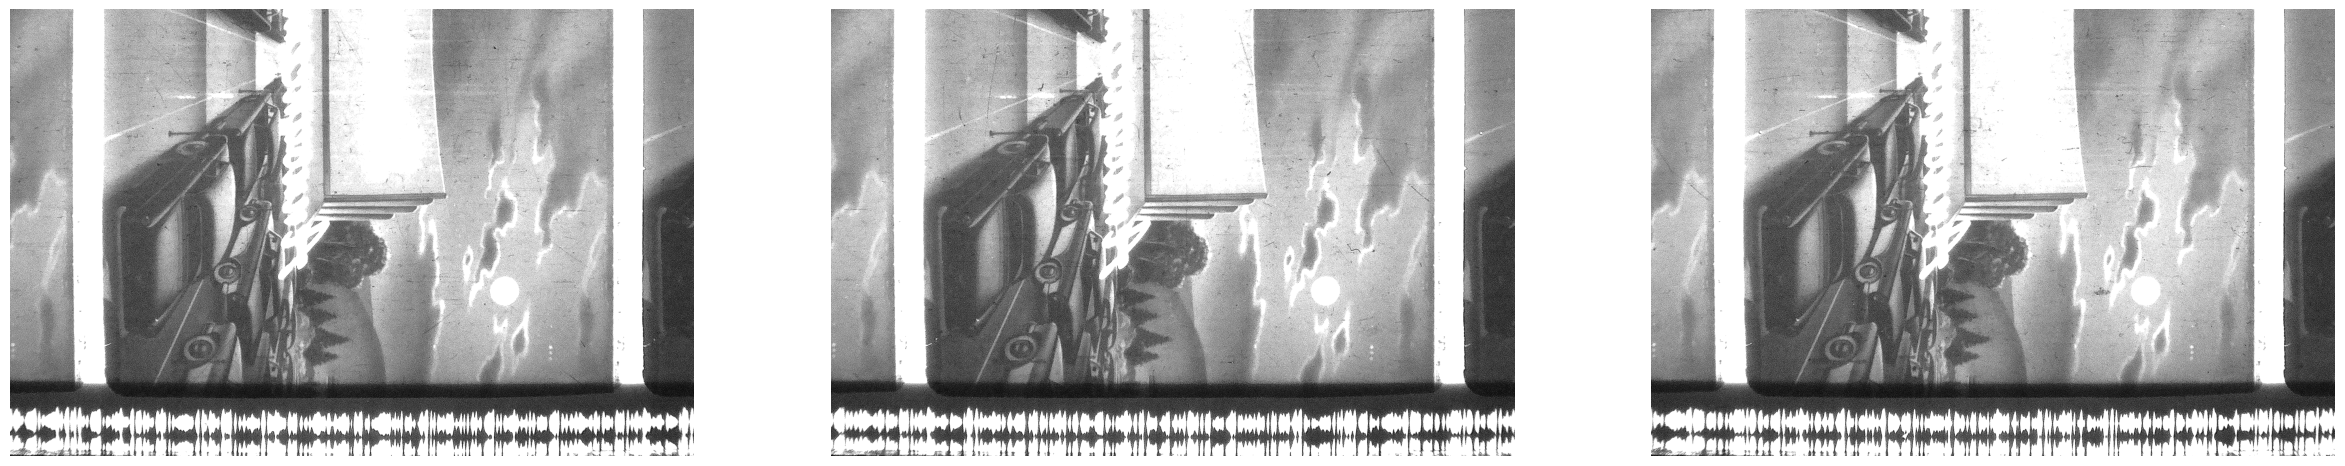

In [45]:
imagefiles = os.listdir("input\onesec\.")
imagefiles.sort()

images = []
cutoff = 0
for filename in imagefiles:
    if cutoff > 2:
        break

    img = cv2.imread("input\onesec\\" + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Default reads in as BGR, we want this as black and white
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    
    # Adjusts the brightness by adding 10 to each pixel value 
    brightness = 5
    # Adjusts the contrast by scaling the pixel values by 2.3 
    contrast = 3 
    img = cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness) 

    # Create the sharpening kernel
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    # Apply the sharpening kernel to the image using filter2D
    img = cv2.filter2D(img, -1, kernel)

    height,width = img.shape
    print(height)
    #img = img[700:height-1000,400:width-2000]
    img = img[700:height-1000,500:width-1000] # just trimming the image
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    images.append(img)
    cutoff = cutoff + 1
num_images = len(images)

images = images[::-1] # Reverse the list order to get the expected order of the optical tracks

plt.figure(figsize=[30,10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap='gray') # matplot reads the channels as RGB, so we need to tell it this is actually grey or we get weird channel issues

In [46]:
stitcher = cv2.Stitcher_create(mode=cv2.STITCHER_SCANS)
status, result = stitcher.stitch(images)
if status == cv2.STITCHER_OK:
    plt.figure(figsize=[30,10])
    plt.imshow(result)
print(status)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\stitching\src\seam_finders.cpp:1142: error: (-215:Assertion failed) src[i].channels() == 3 in function 'cv::detail::GraphCutSeamFinder::Impl::find'
